## Курсовой проект по курсу "Интерпретируемый ИИ и майнинг данных"
### Часть 1: Работа с табличными данными
### Этап 1: Поиск причинно-следственных связей

**Материалы к проекту (файлы):**
X_full.csv
y_full.csv

**Целевая переменная:**
HeartDisease: output class [1: heart disease, 0: Normal]

**Описание датасета:**
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Атрибуты:**
1. Age: age of the patient [years] - **Возраст**
2. Sex: sex of the patient [M: Male, F: Female] - **Пол**
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] - **Тип боли в груди**
4. RestingBP: resting blood pressure [mm Hg] - **Артериальное давление в покое**
5. Cholesterol: serum cholesterol [mm/dl] - **Холестерин** 
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] - **Уровень сахара в крови натощак**
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] - **ЭКГ в покое**
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202] - **Максимальная частота сердечных сокращений**
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No] - **Стенокардия, вызванная физической нагрузкой**
10. Oldpeak: oldpeak = ST [Numeric value measured in depression] - **ST в покое**
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] - **ST при пиковой нагрузке**
12. HeartDisease: output class [1: heart disease, 0: Normal] - **Сердечный приступ**

## Шаг 1: Подготовка инструментов

### 1.1 Необходимые модули

In [1]:
#!pip install dowhy
#!apt install libgraphviz-dev
#!pip install pygraphviz

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from xverse.transformer import WOE
import os, sys
import dowhy
from dowhy import CausalModel
import pygraphviz
import statsmodels

import warnings
warnings.filterwarnings('ignore')

### 1.2 Загрузка данных

In [3]:
FULL_DATA_PATH = 'data/X_full.csv'
FULL_TARGET_PATH = 'data/y_full.csv'

In [4]:
df_base = pd.read_csv(FULL_DATA_PATH)
df = df_base.copy()
target_base = pd.read_csv(FULL_TARGET_PATH)
target = target_base.copy()
display(df.shape, target.shape)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


### 1.3 Подготовка данных

Добавим целевой признак в датасет.

In [6]:
df['HeartDisease'] = target
df['HeartDisease'].replace({0: False, 1: True}, inplace=True)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,False


Посчитаем WOE&IV для признаков

In [7]:
clf = WOE()
clf.fit(df.copy().drop(['HeartDisease'],axis=1), df['HeartDisease'].copy())

WOE(mono_custom_binning={'Age': array([28., 50., 58., 77.]),
                         'Cholesterol': array([ 85., 223., 250., 603.]),
                         'FastingBS': array([0., 1.]),
                         'MaxHR': array([ 60., 125., 150., 202.]),
                         'Oldpeak': array([-2.6,  0. ,  1.2,  6.2]),
                         'RestingBP': array([ 80.        , 123.33333333, 140.        , 200.        ])},
    woe_bins={'Age': {Interval(27.999, 50.0, closed='right'): -0.6363135346371585,
                      Interval(50.0, 58.0, closed='righ...
                            Interval(123.333, 140.0, closed='right'): -0.10483350018157335,
                            Interval(140.0, 200.0, closed='right'): 0.549786208154067},
              'RestingECG': {'LVH': 0.044366002954984364,
                             'Normal': -0.15062826413187325,
                             'ST': 0.4389462267316153},
              'ST_Slope': {'Down': 1.0404091246025382,
                   

In [8]:
clf.iv_df

,Variable_Name,Information_Value
9,ST_Slope,1.821327
1,ChestPainType,1.382674
3,ExerciseAngina,1.158379
6,Oldpeak,0.729693
5,MaxHR,0.711534
10,Sex,0.397320
4,FastingBS,0.326972
0,Age,0.299477
7,RestingBP,0.092633
8,RestingECG,0.050108


Самая высокая важность у признака 'ST_Slope'.<br> 
Проверим влияние признака 'ST_Slope' на целевой признак.<br>
В результате EDA мы выяснили, что люди, у которых показатель ST_Slope == Flat имеют самый высокий шанс получить сердечный приступ.<br>
Treatment для анализа должен быть бинарным, поэтому разобьем данные по признаку ST_Slope на 2 группы.

In [9]:
flat = (df['ST_Slope'] == 'Flat').astype('bool')
df['ST_Slope_flat'] = flat
df = df.drop(['ST_Slope'],axis=1)

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ST_Slope_flat
0,40,M,ATA,140,289,0,Normal,172,N,0.0,False,False
1,49,F,NAP,160,180,0,Normal,156,N,1.0,True,True
2,37,M,ATA,130,283,0,ST,98,N,0.0,False,False
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,True,True
4,54,M,NAP,150,195,0,Normal,122,N,0.0,False,False


In [11]:
for f in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']:
    df[f] = df[f].astype('category')
df=df.astype({'HeartDisease':'bool', 'ST_Slope_flat':'bool'}, copy=False)

In [12]:
features_names = df.columns.to_list()[:-2]
features_names

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak']

## Шаг 2: Поиск причинно-следственных связей

Вам нужно рассмотреть ваши данные и предположить, как могут быть связаны признаки в ваших данных. 
Далее:
1. Рассмотреть модель на основе ваших предположений (ориентированных граф без циклов), словами описать, какие зависимости вы рассматривали. Изобразить граф, который вы рассматривали (2 балла)
2. Применить 3 любых “refutation” метода на ваш выбор и обосновать их выбор (какие цели вы преследовали, выбирая эти методы, что вы хотели проверить), (2 балла)
3. Применить все то же самое для графовой модели, используемой по умолчанию. Получили ли вы те же результаты? (1 балл)

### 2.1 Модель 1: на основе предположений

#### 2.1.1 Моделирование (создание причинно-следственного графа)

В данном пункте предполагаем следующие зависимости:<br>
1. Возраст(Age) влияет на показатель холестерина(Cholesterol), на артериальное давление(RestingBP), на уровень сахара в крови(FastingBS) и на целевой признак сердечного приступа(HeartDisease)
2. Пол(Sex) влияет на целевой признак сердечного приступа(HeartDisease)
3. Тип боли в груди(ChestPainType) влияет на целевой признак сердечного приступа(HeartDisease)
4. Артериальное давление в покое(RestingBP) влияет на ЭКГ в покое(RestingECG)
5. Холестерин(Cholesterol) влияет на наличие стенокардии при физических нагрузках(ExerciseAngina)
6. Уровень сахара в крови(FastingBS) влияет на наличие стенокардии при физических нагрузках(ExerciseAngina), на артериальное давление(RestingBP) и на целевой признак сердечного приступа(HeartDisease)
7. ЭКГ в покое(RestingECG) влияет на ST в покое(Oldpeak) и на ST при пиковой нагрузке(ST_Slope_flat)
8. Максимальный пульс влияет на целевой признак сердечного приступа(HeartDisease)
9. ST в покое(Oldpeak) влияет на целевой признак сердечного приступа(HeartDisease)
10. ST при пиковой нагрузке(ST_Slope_flat) влияет на целевой признак сердечного приступа(HeartDisease)

In [13]:
# Setting a causal graph
causal_graph = """digraph {
Age[label="Age"];
HeartDisease[label="HeartDisease"];
Sex[label="Sex"];
ChestPainType[label="ChestPainType"];
RestingBP[label="RestingBP"];
Cholesterol[label="Cholesterol"];
FastingBS[label="FastingBS"];
RestingECG[label="RestingECG"];
MaxHR[label="MaxHR"];
ExerciseAngina[label="ExerciseAngina"];
Oldpeak[label="Oldpeak"];
ST_Slope_flat[label="ST_Slope_flat"]
U[label="Unobserved Confounders"];
U->HeartDisease; U->MaxHR; U->FastingBS; U->Cholesterol; U->ST_Slope_flat;
Age->HeartDisease; Age->Cholesterol; Age->FastingBS; Age->RestingBP;
Sex->HeartDisease;
ChestPainType->HeartDisease;
RestingBP->RestingECG;
Cholesterol->ExerciseAngina;
FastingBS->HeartDisease; FastingBS->RestingBP;
RestingECG->Oldpeak; RestingECG->ST_Slope_flat;
MaxHR->HeartDisease;
ExerciseAngina->HeartDisease;
Oldpeak->HeartDisease;
ST_Slope_flat->HeartDisease;
}"""

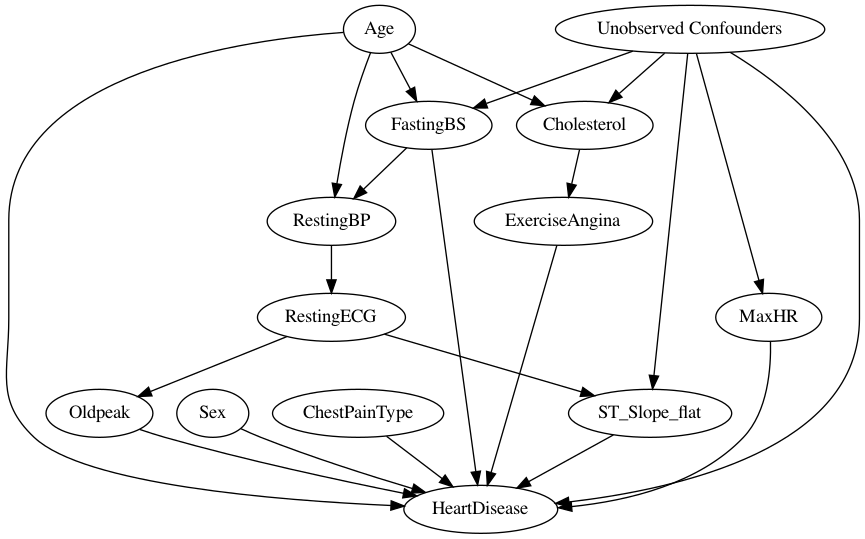

In [14]:
model_with_background= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='ST_Slope_flat',
        outcome='HeartDisease')
model_with_background.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

#### 2.1.2 Идентификация (формулировка того, что оценивать)

Основываясь на причинно-следственном графе, DoWhy находит все возможные способы определения желаемого причинно-следственного эффекта на основе графовой модели. Он использует критерии на основе графов и практическое исчисление, чтобы найти потенциальные способы поиска выражений, которые могут идентифицировать причинный эффект.

In [15]:
identified_estimand = model_with_background.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
────────────────(Expectation(HeartDisease|Sex,Cholesterol,FastingBS,RestingBP,
d[ST_Slope_flat]                                                              

                                                           
ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age))
                                                           
Estimand assumption 1, Unconfoundedness: If U→{ST_Slope_flat} and U→HeartDisease then P(HeartDisease|ST_Slope_flat,Sex,Cholesterol,FastingBS,RestingBP,ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age,U) = P(HeartDisease|ST_Slope_flat,Sex,Cholesterol,FastingBS,RestingBP,ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



#### 2.1.3 Оценка (вычисление предельного значения)

In [16]:
estimate = model_with_background.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")
print("The Causal Estimate is " + str(estimate.value))

The Causal Estimate is 0.33696837513631406


#### 2.1.4 Refutation методы
#### Опровержение (подтверждение предположения)

**1. Add Random Common Cause**: Проверим, меняет ли метод оценки свою оценку после того, как мы добавляем независимую случайную величину в качестве общей причины в набор данных? 

Добавляет случайно выбранные коварианты к данным и повторно запускает анализ, чтобы увидеть, изменилась ли причинно-следственная оценка или нет. Если наше предположение изначально было правильным, то причинно-следственная оценка не должна сильно измениться.

In [17]:
refute_results=model_with_background.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause", random_state=8)
print(refute_results)

Refute: Add a Random Common Cause
Estimated effect:0.33696837513631406
New effect:0.27153762268266085



Оценка изменилась, но не очень сильно. Делаем вывод, что наше предположение верное.

**2. Placebo Treatment**: Посмотрим, что произойдет с предполагаемым причинным эффектом, когда мы заменяем истинную treatment переменную независимой случайной величиной? 

Случайным образом назначает любую ковариату в качестве лечения и повторно запускает анализ. Если наши предположения верны, то эта вновь обнаруженная оценка должна упасть до 0.

In [18]:
res_placebo=model_with_background.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo)

Refute: Use a Placebo Treatment
Estimated effect:0.33696837513631406
New effect:-0.00559432933478735
p value:0.41000000000000003



Оценка упала до нуля, как и ожидалось.

**3. Add Unobserved Common Causes**: Проверим, насколько чувствительна оценка эффекта, когда мы добавляем в набор данных дополнительную общую причину (вмешивающуюся причину), которая коррелирует с treatment и результатом? 

Если наши предположения верны, то не должно быть слишком чувствительным.

In [19]:
res_unobserved=model_with_background.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02, random_state=8)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:0.33696837513631406
New effect:0.26455630215677284



Здесь оценка изменилась сильнее, чем в первом методе. Непонятно, начиная с какой разницы, можно считать исходное предположение неверным.

### 2.2 Модель 2: по умолчанию

#### 2.2.1 Моделирование (создание причинно-следственного графа)

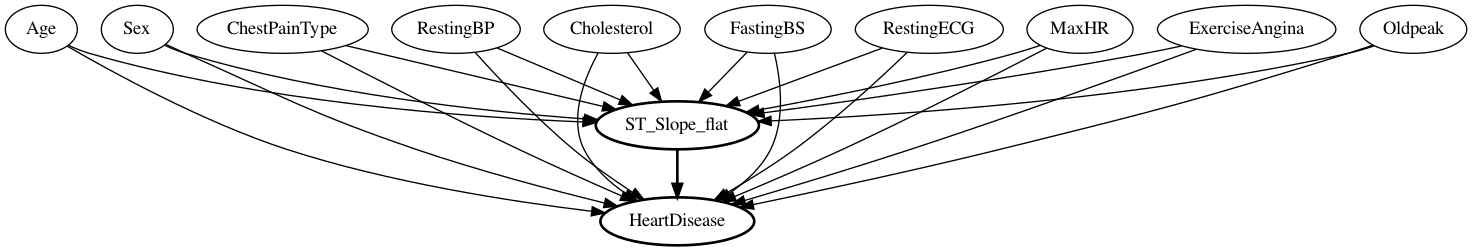

In [20]:
model_default = CausalModel(
                data=df,
                treatment='ST_Slope_flat',
                outcome='HeartDisease',
                common_causes=features_names
            )
model_default.view_model(layout="dot")
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

#### 2.2.2 Идентификация (формулировка того, что оценивать)

Основываясь на причинно-следственном графе, DoWhy находит все возможные способы определения желаемого причинно-следственного эффекта на основе графовой модели. Он использует критерии на основе графов и практическое исчисление, чтобы найти потенциальные способы поиска выражений, которые могут идентифицировать причинный эффект.

In [21]:
identified_estimand_default = model_default.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand_default)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                                      
────────────────(Expectation(HeartDisease|Sex,Cholesterol,FastingBS,RestingBP,
d[ST_Slope_flat]                                                              

                                                           
ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age))
                                                           
Estimand assumption 1, Unconfoundedness: If U→{ST_Slope_flat} and U→HeartDisease then P(HeartDisease|ST_Slope_flat,Sex,Cholesterol,FastingBS,RestingBP,ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age,U) = P(HeartDisease|ST_Slope_flat,Sex,Cholesterol,FastingBS,RestingBP,ChestPainType,RestingECG,Oldpeak,ExerciseAngina,MaxHR,Age)

### Estimand : 2
Estimand name: iv
No such variable found!

### Estimand : 3
Estimand name: frontdoor
No such variable found!



#### 2.2.3 Оценка (вычисление предельного значения)

In [22]:
estimate_default = model_default.estimate_effect(identified_estimand_default,
                                 method_name="backdoor.propensity_score_matching")
print("The Causal Estimate is " + str(estimate_default.value))

The Causal Estimate is 0.33696837513631406


#### 2.2.4 Refutation
#### Опровержение (подтверждение предположения)

**1. Add Random Common Cause**: Проверим, меняет ли метод оценки свою оценку после того, как мы добавляем независимую случайную величину в качестве общей причины в набор данных? 

Добавляет случайно выбранные коварианты к данным и повторно запускает анализ, чтобы увидеть, изменилась ли причинно-следственная оценка или нет. Если наше предположение изначально было правильным, то причинно-следственная оценка не должна сильно измениться.

In [23]:
refute_results_default=model_default.refute_estimate(identified_estimand_default, estimate_default,
        method_name="random_common_cause", random_state=8)
print(refute_results_default)

Refute: Add a Random Common Cause
Estimated effect:0.33696837513631406
New effect:0.32061068702290074



Для графа по умолчанию разница между оценками получилась меньше.

**2. Placebo Treatment**: Посмотрим, что произойдет с предполагаемым причинным эффектом, когда мы заменяем истинную treatment переменную независимой случайной величиной? 

Случайным образом назначает любую ковариату в качестве лечения и повторно запускает анализ. Если наши предположения верны, то эта вновь обнаруженная оценка должна упасть до 0.

In [24]:
res_placebo_default=model_default.refute_estimate(identified_estimand_default, estimate_default,
        method_name="placebo_treatment_refuter", placebo_type="permute")
print(res_placebo_default)

Refute: Use a Placebo Treatment
Estimated effect:0.33696837513631406
New effect:0.0004907306434023996
p value:0.49



Здесь так же упала до нуля, как и ожидалось.

**3. Add Unobserved Common Causes**: Проверим, насколько чувствительна оценка эффекта, когда мы добавляем в набор данных дополнительную общую причину (вмешивающуюся причину), которая коррелирует с treatment и результатом? 

Если наши предположения верны, то не должно быть слишком чувствительным.

In [25]:
res_unobserved_default=model_default.refute_estimate(identified_estimand_default, estimate_default, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02, random_state=8)
print(res_unobserved_default)

Refute: Add an Unobserved Common Cause
Estimated effect:0.33696837513631406
New effect:0.2736297421524148



Третий метод для графа по умолчанию показал похожие результаты, как и для графа на основе предположений.

В целом результаты для графовой модели по умолчанию и для модели, основанной на наших предположениях похожи.